In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

from astropy import units as u
from astropy.coordinates import SkyCoord

In [2]:
filename='baseline_v2.1_10yrs.db'
name = os.path.basename(filename).replace('.db','')
conn = maf.db.OpsimDatabase(filename)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)


In [3]:
bundleList = []
metric = maf.metrics.CountMetric(col='night')
# Select all the visits
sql = ''
slicer = maf.slicers.HealpixSlicer()
bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name))


Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()


Querying database observations with no constraint for columns ['rotSkyPos', 'fieldRA', 'night', 'fieldDec'].
Found 2085874 visits
Running:  ['baseline_v2_1_10yrs_Count_night_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


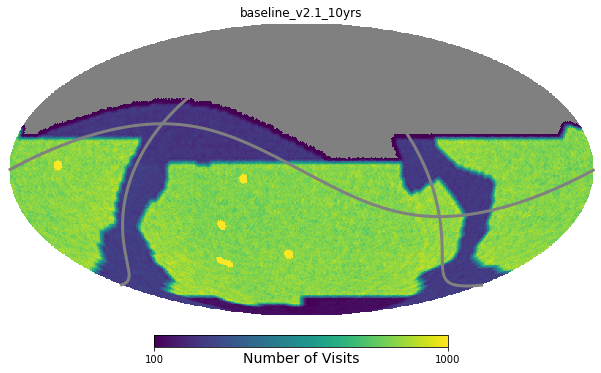

In [14]:
hp.mollview(bundleList[0].metricValues, max=1000, min=100, unit='Number of Visits', title='baseline_v2.1_10yrs')


e_long = np.arange(0,361,1)
e_lat = e_long * 0

c=SkyCoord(lat=e_lat*u.deg, lon=e_long*u.deg, frame='barycentrictrueecliptic')

c2 = c.transform_to('icrs')

hp.projplot(np.pi/2 - c2.dec.rad, c2.ra.rad, color='gray', linewidth=3)

c3=SkyCoord(e_long*u.deg, e_lat*u.deg, frame='galactic') #frame='galactocentric')
c2 = c3.transform_to('icrs')
hp.projplot(np.pi/2 - c2.dec.rad, c2.ra.rad, color='gray', linewidth=3)
plt.savefig('counts.png')